In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Assignments

/content/drive/MyDrive/Assignments


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
data=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
data.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [6]:
new_data=pd.DataFrame().assign(Price=data["Price"],Age=data["Age_08_04"],km=data["KM"],hp=data["HP"],cc=data["cc"],doors=data["Doors"],
                               Gears=data["Gears"],QT=data["Quarterly_Tax"],WT=data["Weight"])
new_data.sample(2)

,Price,Age,km,hp,cc,doors,Gears,QT,WT
851,9250,60,65259,110,1600,3,5,69,1050
1066,8950,69,156204,72,2000,3,5,185,1115


In [7]:
new_data.corr()

,Price,Age,km,hp,cc,doors,Gears,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [8]:
new_data.shape

(1436, 9)

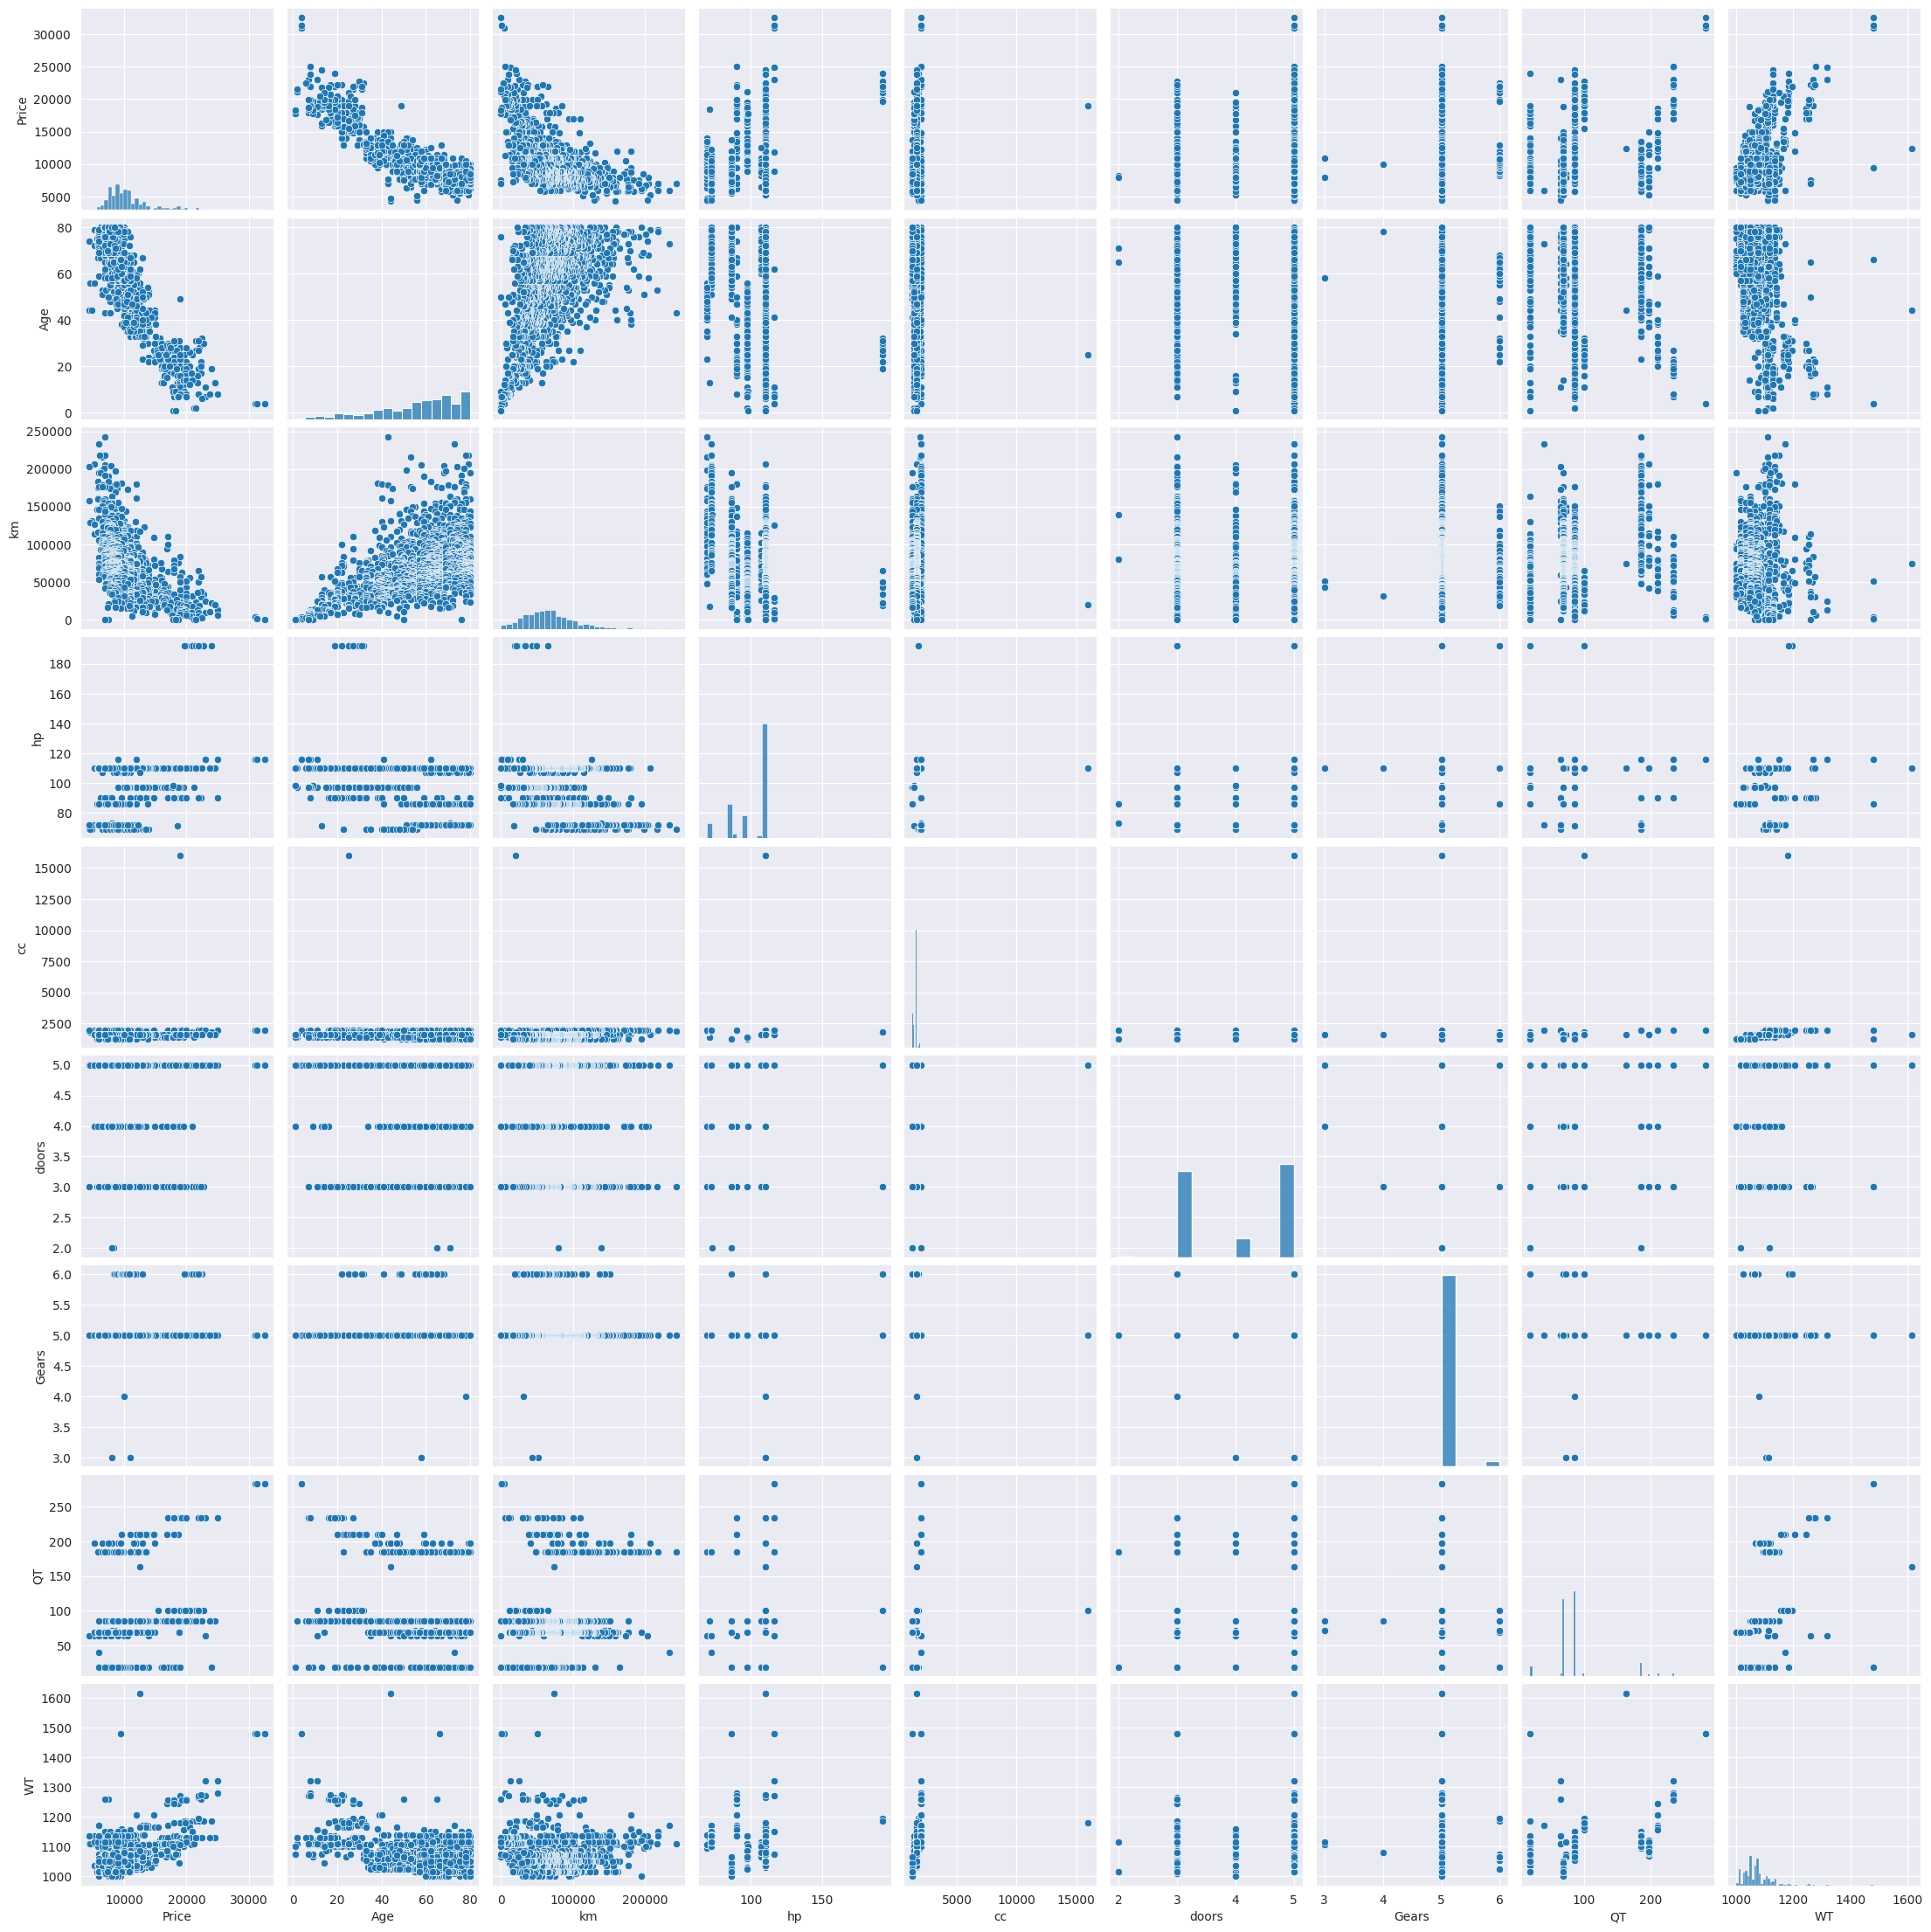

In [9]:
sns.set_style(style="darkgrid")
sns.pairplot(new_data)

In [10]:
new_data.head(1)

,Price,Age,km,hp,cc,doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165


In [11]:
model=smf.ols('Price~Age+km+hp+cc+doors+Gears+QT+WT',data=new_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:04:20   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
km            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
hp            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
WT            16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Checking for assumption

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [13]:
#Testing VIF
def compt_vif(consider_feature):
  x=new_data[consider_feature]
  x['intercept']=1
  vif=pd.DataFrame()
  vif["variable"]=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif=vif[vif["variable"]!='intercept']
  return vif

In [14]:
new_data.head(1)

,Price,Age,km,hp,cc,doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165


In [15]:
consider_feature=["Age","km","hp","cc","doors","Gears","QT","WT"]
compt_vif(consider_feature).sort_values("VIF",ascending=False)

,variable,VIF
7,WT,2.516420
6,QT,2.311431
0,Age,1.884620
1,km,1.756905
2,hp,1.419422
3,cc,1.163894
4,doors,1.156575
5,Gears,1.098723


In [16]:
#Checking for assumption for 1
def stand_val(val):
  return (val-val.mean())/val.std()

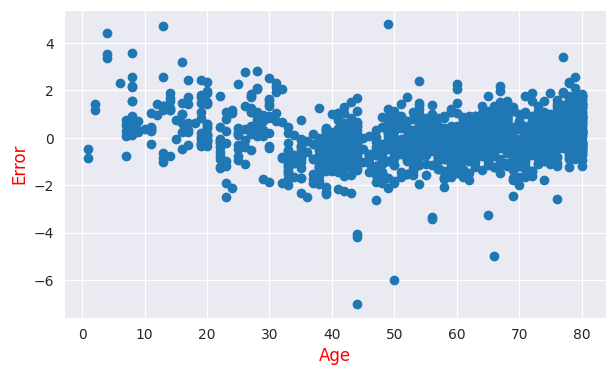

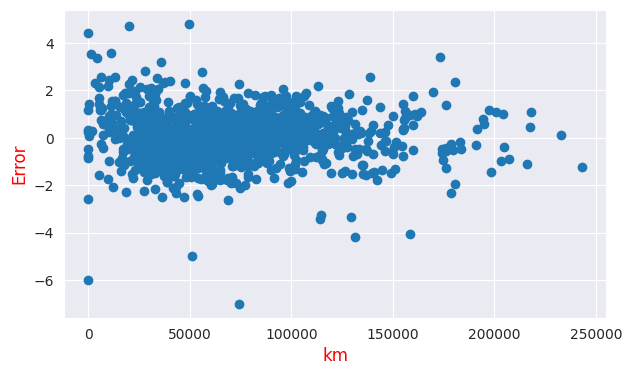

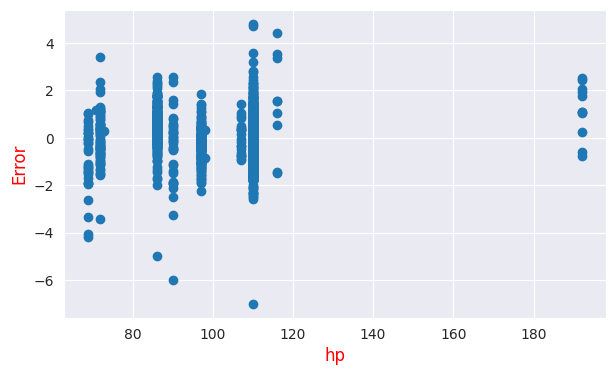

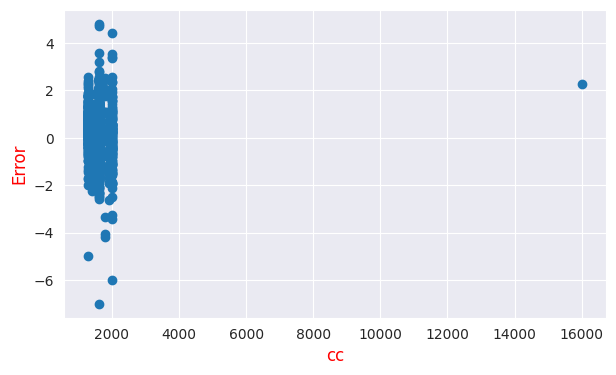

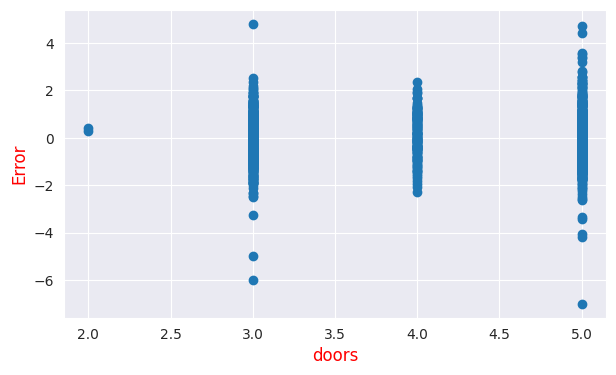

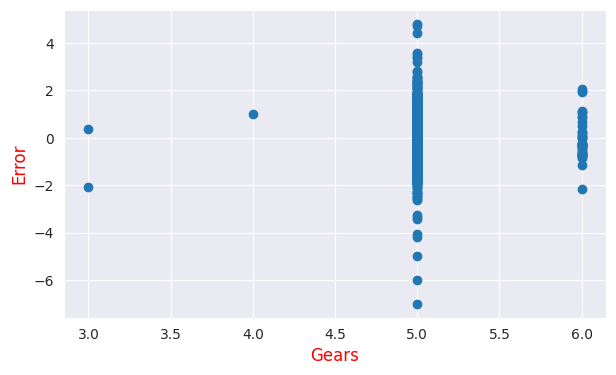

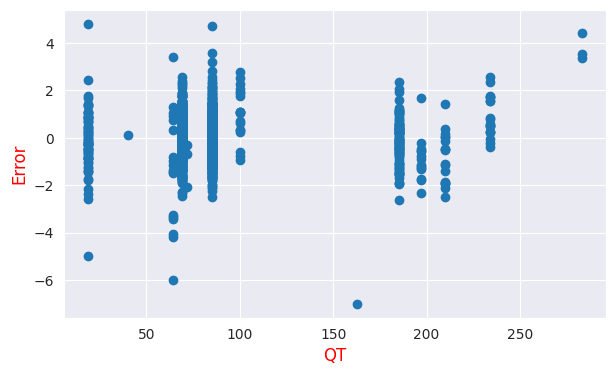

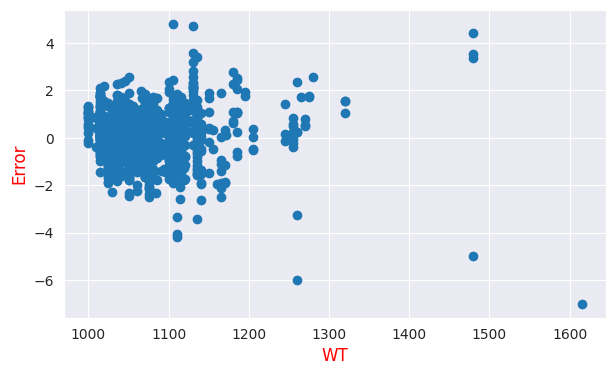

In [17]:
def plot_residuals(error, X_features_val, X_features_name):
    for i in range(len(X_features_val)):
        plt.figure(figsize=(7, 4))
        plt.scatter(X_features_val[i], error)
        plt.xlabel(X_features_name[i], color="red", size=12)
        plt.ylabel("Error", color="red", size=12)
        plt.show()

if __name__ == "__main__":
    error = stand_val(model.resid)
    X_features_val = [new_data[i] for i in new_data.columns[1:]]
    X_features_name = new_data.columns[1:].values.tolist()
    plot_residuals(error, X_features_val, X_features_name)

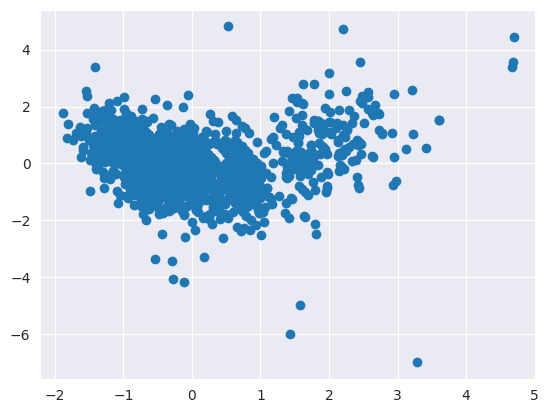

In [18]:
#checking for 4th assumption
error=stand_val(model.resid)
y_pred=stand_val(model.fittedvalues)
plt.scatter(y_pred,error)

In [19]:

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [20]:
new_data.shape

(1436, 9)

In [21]:
n=9
m=1436
(3*n)/m

0.018802228412256268

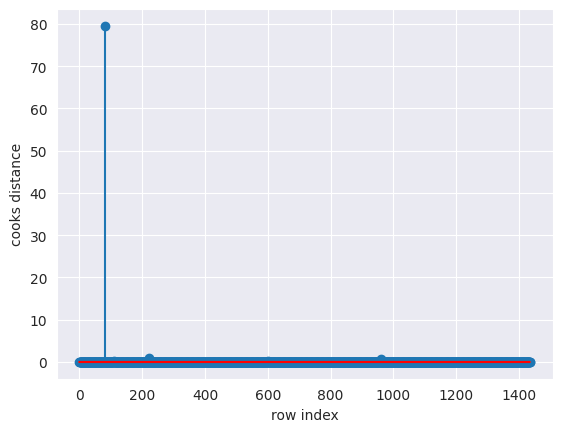

In [22]:
plt.stem(np.arange(len(new_data)),np.round(c,3))
plt.hlines(y=0.018802228412256268,xmin=0,xmax=1436,color="red")
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [23]:
np.where(c>0.018802228412256268)

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058]),)

In [24]:
data1=new_data.drop(new_data.index[[14,16,49,80,109,110,111,141,191,192,221,523,601,654,960,991,1058]],axis=0).reset_index()
data1.shape

(1419, 10)

In [25]:
model1=smf.ols('Price~Age+km+hp+cc+doors+Gears+QT+WT',data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:04:46   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
Age         -111.4226      2.398    -46.467      0.000    -116.126    -106.719
km            -0.0175      0.001    -15.347      0.000      -0.020      -0.015
hp            28.9815      2.768     10.472      0.000      23.552      34.410
cc            -3.3519      0.299    -11.216      0.000      -3.938      -2.766
doors       -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears        308.8824    180.506      1.711      0.087     -45.206     662.971
QT             2.1111      1.358      1.555      0.120      -0.553       4.775
WT            31.4161      1.395     22.514      0.000      28.679      34.153
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

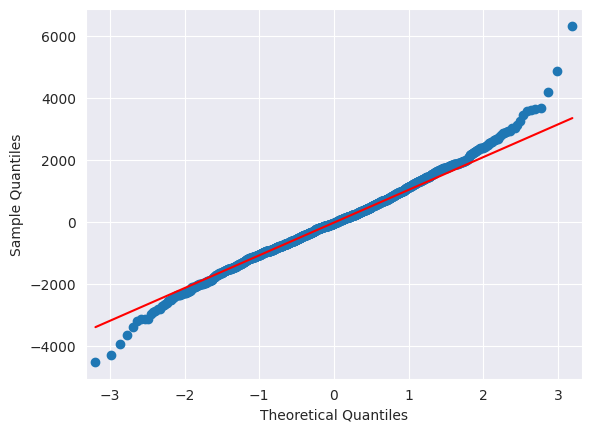

In [26]:
qqplot=sm.qqplot(model1.resid,line="q")

In [28]:
model1.predict(data1)

0       16310.888673
1       15857.336139
2       16291.658688
3       15958.899033
4       15836.323468
            ...     
1414     9182.068160
1415     8560.624043
1416     8706.721503
1417     8819.891793
1418    10878.107228
Length: 1419, dtype: float64

In [30]:
model1.rsquared

0.8876657300062551